In [229]:
import numpy as np
import pandas as pd

In [230]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [231]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1942,ham,K...k:)why cant you come here and search job:),NaN,NaN,NaN
4031,ham,I'm very happy for you babe ! Woo hoo party on...,NaN,NaN,NaN
561,ham,Thanx 4 e brownie it's v nice...,NaN,NaN,NaN
5028,spam,I'd like to tell you my deepest darkest fantas...,NaN,NaN,NaN
1453,ham,Stupid.its not possible,NaN,NaN,NaN


In [232]:
df.shape

(5572, 5)

In [233]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Reprocessing
# 4. Model Building
# 5. Evaluation
# 6. Imrovement
# 7. Website
# 8. Deploy

In [234]:
# 1. Data Cleaning

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [236]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [237]:
df.sample(5)

,v1,v2
2657,ham,Dai &lt;#&gt; naal eruku.
2744,ham,"Tick, tick, tick ... Babe"
4470,ham,Wa... U so efficient... Gee... Thanx...
4888,ham,"Japanese Proverb: If one Can do it, U too Can ..."
3700,ham,Shall i get my pouch?


In [238]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1707,ham,Was doing my test earlier. I appreciate you. W...
2974,ham,"Don't worry, * is easy once have ingredients!"
2096,ham,I'm done...
4987,ham,Which channel:-):-):):-).
3519,ham,No it will reach by 9 only. She telling she wi...


In [239]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [240]:
df['target'] = encoder.fit_transform(df['target'])

In [241]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [242]:
# Missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [243]:
# check for duplicate values
df.duplicated().sum()

403

In [244]:
# Remove Duplicated Values
df = df.drop_duplicates(keep = 'first')

In [245]:
df.duplicated().sum()

0

In [246]:
df.shape

(5169, 2)

In [247]:
# 2. EDA --> Exporatory Data Analysis

In [248]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [249]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

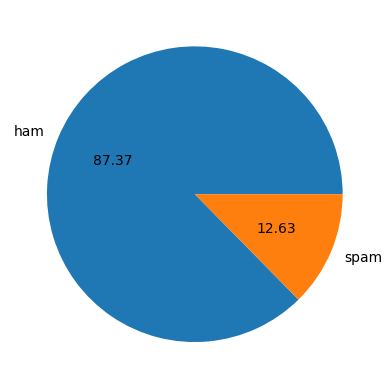

In [250]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [251]:
# Data is Imbalance

In [252]:
import nltk

In [253]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [254]:
df['num_characters'] = df['text'].apply(len)

In [255]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [256]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [257]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [258]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [259]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [260]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [261]:
# ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [262]:
# spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [263]:
import seaborn as sns

<Axes: xlabel='num_words', ylabel='Count'>

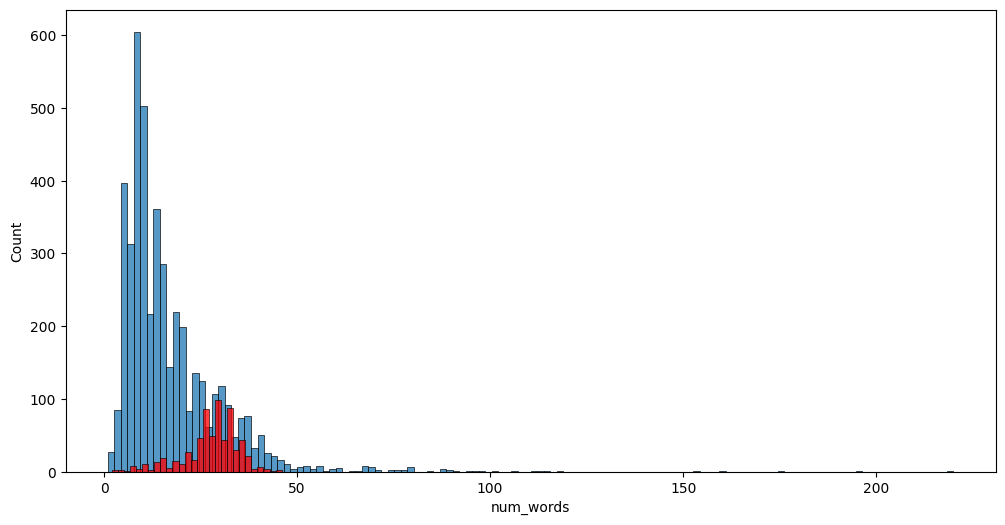

In [264]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

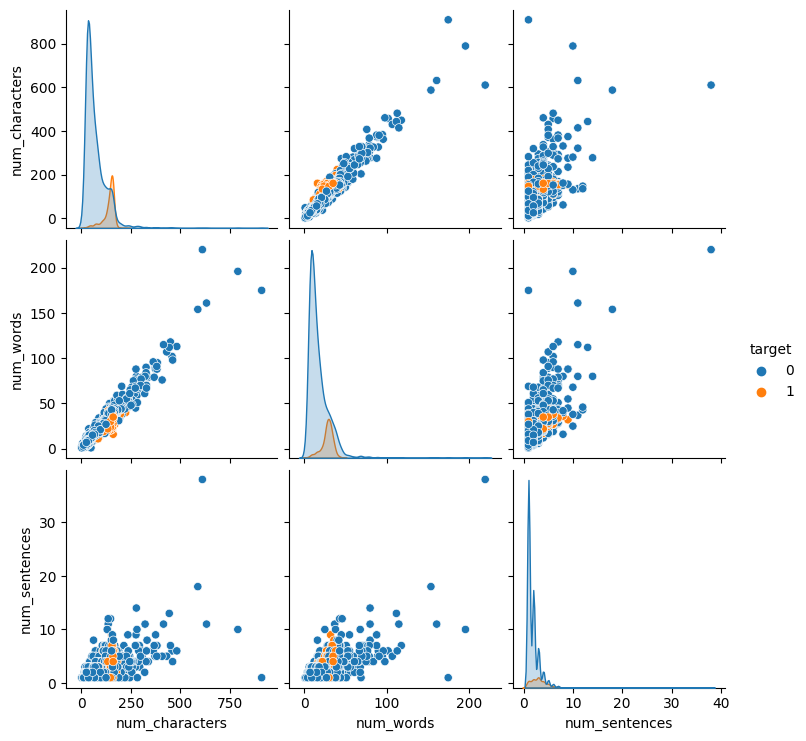

In [265]:
sns.pairplot(df, hue = 'target')

<Axes: >

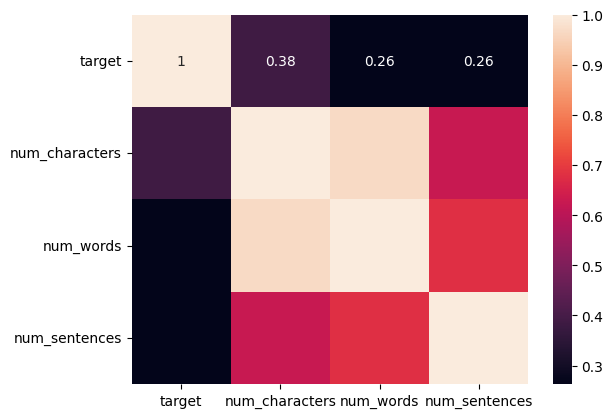

In [266]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot = True)

In [267]:
# 3. Data Processing
# - Lower Case
# - Tokenization
# - Removing special characters
# - Removing stop words and punctuation
# - stemming/Lemitization

In [268]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    y = text[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english')  and i not in string.punctuation:
            y.append(i)
    
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [269]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem(('loving'))

'love'

In [270]:
 import nltk
 nltk.download('stopwords')
 from  nltk.corpus import stopwords
 stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [271]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [272]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi .. avail bugi n great world la e buffet ... cine got amor wat ...'

In [273]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [274]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem(('loving'))

'love'

In [275]:
df['transform_text'] = df['text'].apply(transform_text)

In [276]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 400, min_font_size = 10,background_color = 'white')

In [277]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = " "))

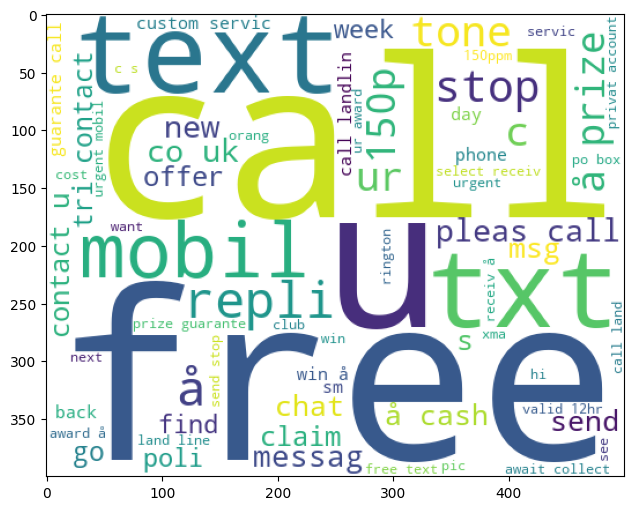

In [278]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [279]:
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = " "))

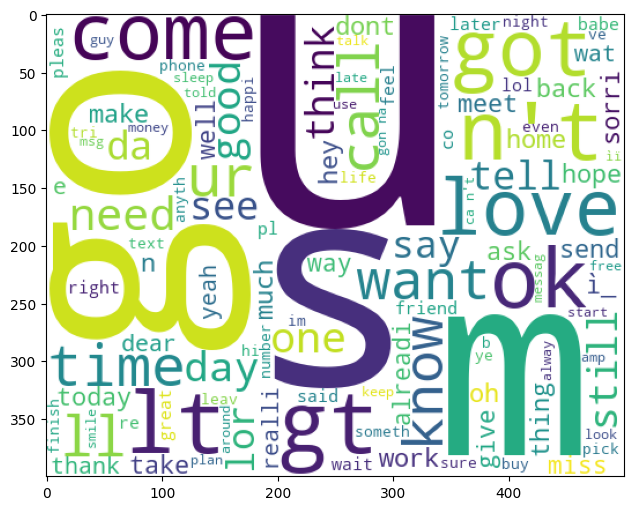

In [280]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [281]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [282]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
            spam_corpus.append(word)

In [283]:
len(spam_corpus)

11083

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, "'s"),
  Text(19, 0, 'urgent'),
  Text(20, 0, 'nokia'),
  Text(21, 0, 'contact'),
  Text(22, 0, 'award'),
  Text(23, 0, 'phone'),
  Text(24, 0, 'cash'),
  Text(25, 0, 'pleas'),
  Text(26, 0, 'week'),
  Text(27, 0, 'win'),
  Text(28, 0, 'c'),
  Text(29, 0, 'collect')])

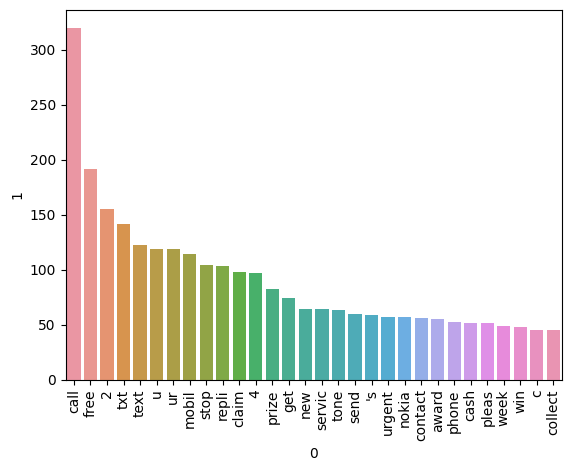

In [284]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['0', '1'])

# Plotting using seaborn barplot
sns.barplot(x='0', y='1', data=df_word_counts)
plt.xticks(rotation = 'vertical')

In [285]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
            ham_corpus.append(word)

In [286]:
len(ham_corpus)

39894

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '...'),
  Text(1, 0, 'u'),
  Text(2, 0, '..'),
  Text(3, 0, "'s"),
  Text(4, 0, 'go'),
  Text(5, 0, "'m"),
  Text(6, 0, 'get'),
  Text(7, 0, "n't"),
  Text(8, 0, 'gt'),
  Text(9, 0, 'lt'),
  Text(10, 0, '2'),
  Text(11, 0, 'come'),
  Text(12, 0, 'got'),
  Text(13, 0, 'know'),
  Text(14, 0, 'like'),
  Text(15, 0, 'call'),
  Text(16, 0, 'time'),
  Text(17, 0, 'ok'),
  Text(18, 0, 'love'),
  Text(19, 0, 'good'),
  Text(20, 0, 'want'),
  Text(21, 0, "''"),
  Text(22, 0, 'ur'),
  Text(23, 0, "'ll"),
  Text(24, 0, 'day'),
  Text(25, 0, 'need'),
  Text(26, 0, 'one'),
  Text(27, 0, 'lor'),
  Text(28, 0, '4'),
  Text(29, 0, 'home')])

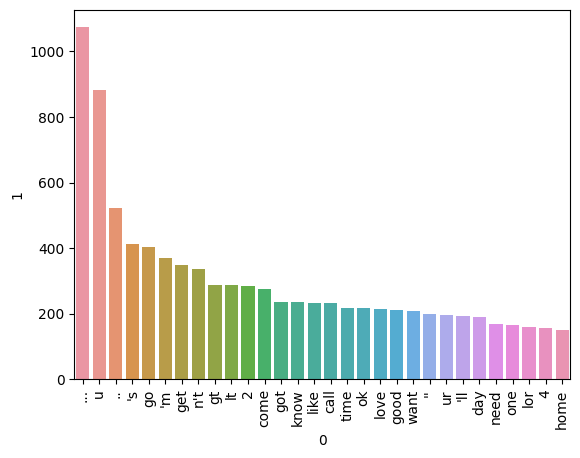

In [287]:
from collections import Counter
word_counts = Counter(ham_corpus).most_common(30)
df_word_counts = pd.DataFrame(word_counts, columns=['0', '1'])

# Plotting using seaborn barplot
sns.barplot(x='0', y='1', data=df_word_counts)
plt.xticks(rotation = 'vertical')

In [288]:
# Text Vectorization
# Using Bag Of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [289]:
# 4. Model Building

In [323]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [324]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [325]:
X.shape

(5169, 3000)

In [326]:
y = df['target'].values

In [327]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [328]:
# from sklearn.model_selection import train_test_split

In [329]:
# X_train,X_test,y_train,y_Test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [330]:
# from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [331]:
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()

In [332]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_metrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

In [333]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [335]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [336]:
gnb.fit(X_train, y_train)

# Predicting labels for the test set
y_pred1 = gnb.predict(X_test)

In [337]:
# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))

Accuracy: 0.8781431334622823
Confusion Matrix:
 [[790 106]
 [ 20 118]]
Precision: 0.5267857142857143


In [338]:
mnb.fit(X_train, y_train)

# Predicting labels for the test set
y_pred2 = mnb.predict(X_test)

In [339]:
# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

Accuracy: 0.9748549323017408
Confusion Matrix:
 [[896   0]
 [ 26 112]]
Precision: 1.0


In [340]:
bnb.fit(X_train, y_train)

# Predicting labels for the test set
y_pred3 = bnb.predict(X_test)

In [341]:
# Evaluating the classifier
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

Accuracy: 0.988394584139265
Confusion Matrix:
 [[896   0]
 [ 12 126]]
Precision: 1.0


In [342]:
# tfidf --> MNB

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [344]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = '11')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gdbt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [364]:
from sklearn.linear_model import LogisticRegression
Clfs = {
    
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : GradientBoostingClassifier(),
    'xgb' : xgb
    
}

In [365]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [366]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777562862669246, 0.9752066115702479)

In [367]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in Clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [349]:
# performance_df = pd.DataFrame({'Algorithm':Clfs.keys(),'Accuracy':accuracy_scores,'precision':precision_scores}).sort_values('Precision',ascending = False)

In [350]:
# Model improve 
# 1. Change the max_features parameter of Tfidf

In [369]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier

# Initialize classifiers
Clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': LogisticRegression(),  # Initialize LogisticRegression without specifying penalty
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': GradientBoostingClassifier(),
    'xgb': xgb
}

# Define train_classifier function
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# Initialize lists to store scores
accuracy_scores = []
precision_scores = []

# Loop over classifiers and train
for name, clf in Clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For SVC
Accuracy - 0.9777562862669246
Precision - 0.9752066115702479
For KN
Accuracy - 0.9042553191489362
Precision - 1.0
For NB
Accuracy - 0.9748549323017408
Precision - 1.0
For DT
Accuracy - 0.9303675048355899
Precision - 0.83
For LR
Accuracy - 0.9622823984526112
Precision - 0.9805825242718447
For RF
Accuracy - 0.9758220502901354
Precision - 0.9829059829059829
For AdaBoost
Accuracy - 0.9729206963249516
Precision - 0.9583333333333334
For BgC
Accuracy - 0.9564796905222437
Precision - 0.8444444444444444
For ETC
Accuracy - 0.9806576402321083
Precision - 0.9758064516129032
For GBDT
Accuracy - 0.9622823984526112
Precision - 0.9626168224299065
For xgb
Accuracy - 0.9758220502901354
Precision - 0.9669421487603306


In [371]:
performance_df = pd.DataFrame({'Algorithm':Clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [372]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.974855,1.000000
5,RF,0.975822,0.982906
4,LR,0.962282,0.980583
8,ETC,0.980658,0.975806
0,SVC,0.977756,0.975207
10,xgb,0.975822,0.966942
9,GBDT,0.962282,0.962617
6,AdaBoost,0.972921,0.958333
7,BgC,0.956480,0.844444


In [373]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [374]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.974855
2,RF,Accuracy,0.975822
3,LR,Accuracy,0.962282
4,ETC,Accuracy,0.980658
5,SVC,Accuracy,0.977756
6,xgb,Accuracy,0.975822
7,GBDT,Accuracy,0.962282
8,AdaBoost,Accuracy,0.972921
9,BgC,Accuracy,0.956480


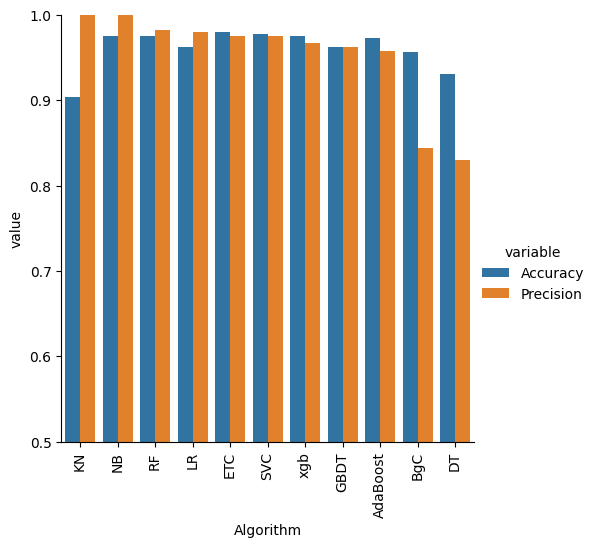

In [375]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [376]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [378]:
temp_df = pd.DataFrame({'Algorithm':Clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [379]:
temp_df = pd.DataFrame({'Algorithm':Clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [380]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [381]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [382]:
temp_df = pd.DataFrame({'Algorithm':Clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [383]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000,0.974855,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,LR,0.962282,0.980583,0.962282,0.980583,0.962282,0.980583,0.962282,0.980583
4,ETC,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806,0.980658,0.975806
5,SVC,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207,0.977756,0.975207
6,xgb,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942,0.975822,0.966942
7,GBDT,0.962282,0.962617,0.962282,0.962617,0.962282,0.962617,0.962282,0.962617
8,AdaBoost,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333,0.972921,0.958333
9,BgC,0.956480,0.844444,0.956480,0.844444,0.956480,0.844444,0.956480,0.844444


In [384]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [385]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [386]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [387]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9919354838709677


In [388]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [389]:
from sklearn.ensemble import StackingClassifier

In [390]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [391]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9696969696969697


In [392]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))